In [1]:
from __future__ import print_function
from matplotlib import pyplot as plt
# get_ipython().magic(u'matplotlib auto')
import tensorflow as tf
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
# import torch
from tensorflow import keras
# config = tf.ConfigProto( device_count = {'GPU': 0 } )
# sess = tf.Session(config=config)
# keras.backend.set_session(sess)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation
from tensorflow import reshape
from keras.utils import np_utils
from tensorflow.keras.layers import Conv1D,Conv2D, MaxPooling1D,AveragePooling1D
from tensorflow.keras.layers import SeparableConv1D
from tensorflow.keras.layers import ZeroPadding2D,ZeroPadding1D, MaxPooling2D, Bidirectional
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from scipy.io import loadmat
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import std
# import coremltools
# from torch import nn, optim
# import torch.nn.functional as F
import scipy.io
from scipy import stats
from IPython.display import display, HTML
from tensorflow.keras import optimizers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU, SimpleRNN
from tensorflow.keras.layers import TimeDistributed
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
def historyVisualization(history):
    # Plot training & validation loss values
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['mean_absolute_error'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['MSE', 'MAE'], loc='upper left')
    plt.show()
def plotPredict(y_pred, y_test):
    plt.title('Predicted vs Actual')
    plt.xlabel('x')
    plt.ylabel('value')
    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test, label='Actual ')
    plt.legend()
    plt.show()

In [3]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(20, 14))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [4]:
# pip install mat73

In [5]:
# import mat73

In [6]:
# mat1=mat73.loadmat('/media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/nina_DB2_sEMG_preprocess_data.mat')
# nina_raw_train=mat1['Training_process_data']
# nina_raw_valid=mat1['Valid_raw_data']
# print('raw_Train_data',nina_raw_train)

In [7]:
# nina_raw_test=mat1['Testing_process_data'] 
# # print('raw_valid_data',nina_raw_valid)
# print('raw_Test_data',nina_raw_test)

In [8]:
# np.savetxt("/media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/nina_pro_DB2_Train.csv", nina_raw_train, delimiter=",")
# # np.savetxt("/content/drive/My Drive/codes/nina_prep_python/rawdata/nina_pro_Valid.csv", nina_raw_valid, delimiter=",")

In [9]:
# np.savetxt("/media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/nina_pro_DB2_Test.csv", nina_raw_test, delimiter=",")

In [10]:
N_FEATURES = 8

In [11]:
column_names = ['C'+str(j) for j in range(1, N_FEATURES+1)]
lst = ['Class_label']
column_names = column_names+lst
print(column_names)

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'Class_label']


In [12]:
def read_data_Train(file_path_Train):
    df_Train = pd.read_csv(file_path_Train,header=None,names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Train['Class_label'].replace(regex=True,inplace=True,to_replace=r';',value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Train['Class_label'] = df_Train['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Train.dropna(axis=0, how='any', inplace=True)
    return df_Train
def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

In [13]:
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [14]:
def read_data_Test(file_path_Test):
    df_Test = pd.read_csv(file_path_Test,header=None,names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Test['Class_label'].replace(regex=True,inplace=True,to_replace=r';',value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Test['Class_label'] = df_Test['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Test.dropna(axis=0, how='any', inplace=True)
    return df_Test

In [15]:
# path='/media/naveen/nav/mat_codes/BioPatRec/prep_wave/Total_process_TT/'
# path='/media/naveen/nav/mat_codes/BioPatRec/prep_WOR_BP_D2/Total_process_TT/'
# path='/media/naveen/nav/mat_codes/BioPatRec/prep_seg_CW_WOR_BP_D2/Total_process_TT/'
# naveen_prep
path='/media/naveen/nav/mat_codes/BioPatRec/no_prep/Total_process_TT/'
# olsson_prep
# path='/media/naveen/nav/mat_codes/BioPatRec/olsson_prep_WOR_BP_D2/Total_process_TT/'

In [16]:
# file_path_train=path+'Biopatrec_26class_17sub_train'+'.'+'csv'
# file_path_train=path+'Biopatrec_WOR_BP_D2_train'+'.'+'csv'
# file_path_train=path+'Biopatrec_seg_CW_WOR_BP_D2_train'+'.'+'csv'
# naveen_path
file_path_train=path+'Biopatrec_26class_17sub_train_no_prep'+'.'+'csv'
# olsson_path
# file_path_train=path+'Biopatrec_olsson_WOR_BP_D2_train'+'.'+'csv'
print(file_path_train)

/media/naveen/nav/mat_codes/BioPatRec/no_prep/Total_process_TT/Biopatrec_26class_17sub_train_no_prep.csv


In [17]:
# file_path_test=path+'Biopatrec_26class_17sub_test'+'.'+'csv'
# file_path_test=path+'Biopatrec_WOR_BP_D2_test'+'.'+'csv'
# file_path_test=path+'Biopatrec_seg_CW_WOR_BP_D2_test'+'.'+'csv'
# naveen_path
file_path_test=path+'Biopatrec_26class_17sub_test_no_prep'+'.'+'csv'
# olsson_path
# file_path_test=path+'Biopatrec_olsson_WOR_BP_D2_test'+'.'+'csv'
print(file_path_test)

/media/naveen/nav/mat_codes/BioPatRec/no_prep/Total_process_TT/Biopatrec_26class_17sub_test_no_prep.csv


In [18]:
df_Train = read_data_Train(file_path_train)
# Describe the data
show_basic_dataframe_info(df_Train)
df_Train.head(10)

Number of columns in the dataframe: 9
Number of rows in the dataframe: 5304000



,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,0.042100,0.063803,0.039470,0.034702,0.028454,0.008396,0.045553,0.028783,1.0
1,0.029769,0.038812,0.026317,0.048019,0.018918,0.023357,0.039963,0.041443,1.0
2,0.036510,0.027468,0.026481,0.023522,0.020069,0.038319,0.035688,0.013492,1.0
3,0.035195,0.030427,0.044402,0.020069,0.028290,0.027632,0.023686,0.039141,1.0
4,0.033551,0.042265,0.022042,0.026481,0.039963,0.027468,0.026974,0.027796,1.0
5,0.038155,0.070051,0.026317,0.041772,0.046540,0.045882,0.006587,0.058542,1.0
6,0.031907,0.060844,0.024837,0.012177,0.025824,0.036675,0.040785,0.041443,1.0
7,0.048513,0.058377,0.044731,0.016288,0.015794,0.022535,0.019083,0.029441,1.0
8,0.034044,0.039634,0.036510,0.026974,0.042100,0.016288,0.017274,0.028783,1.0
9,0.039141,0.025001,0.011355,0.036017,0.058049,-0.010019,0.014315,0.009053,1.0


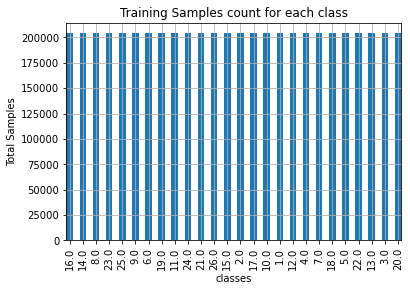

In [19]:
df_Train['Class_label'].value_counts().plot(kind='bar',
                                   title='Training Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [20]:
df_Test = read_data_Test(file_path_test)
# Describe the data
show_basic_dataframe_info(df_Test)
df_Test.head(10)

Number of columns in the dataframe: 9
Number of rows in the dataframe: 2652000



,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,0.033058,0.040292,0.023028,0.028125,0.043745,0.014808,0.002806,0.018096,1.0
1,0.027468,0.040621,0.026317,0.066927,0.046540,0.023357,0.028454,0.037826,1.0
2,0.025988,0.044238,0.011848,0.051965,0.036510,0.037826,0.023686,0.053116,1.0
3,0.032564,0.031742,0.007738,0.043909,0.025988,0.028783,0.033222,0.040785,1.0
4,0.042923,0.058542,0.012177,0.030098,0.044073,0.032564,0.028454,0.021549,1.0
5,0.031907,0.042923,-0.018075,0.051308,0.047855,0.016288,0.018425,0.037168,1.0
6,0.033222,0.030427,0.009875,0.013657,0.021549,0.025001,0.021220,0.018096,1.0
7,0.041772,0.009382,0.055254,0.019411,0.022864,0.019576,0.025166,0.041114,1.0
8,0.033387,0.024508,0.051143,0.017767,0.017932,0.021220,0.025166,0.023851,1.0
9,0.034209,0.070215,0.038977,0.037168,0.023193,0.016288,0.031742,0.029441,1.0


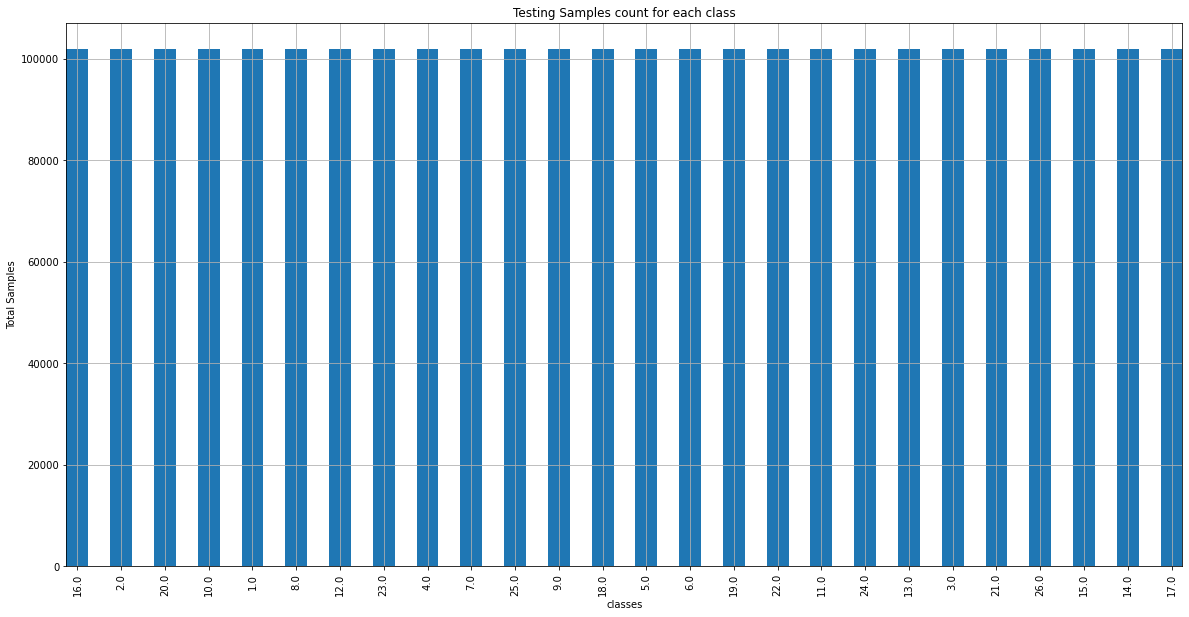

In [21]:
df_Test['Class_label'].value_counts().plot(kind='bar',
                                   title='Testing Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [22]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,0.04210,0.06380,0.03947,0.03470,0.02845,0.00840,0.04555,0.02878,1.00000
1,0.02977,0.03881,0.02632,0.04802,0.01892,0.02336,0.03996,0.04144,1.00000
2,0.03651,0.02747,0.02648,0.02352,0.02007,0.03832,0.03569,0.01349,1.00000
3,0.03519,0.03043,0.04440,0.02007,0.02829,0.02763,0.02369,0.03914,1.00000
4,0.03355,0.04226,0.02204,0.02648,0.03996,0.02747,0.02697,0.02780,1.00000


In [23]:
scaler = preprocessing.StandardScaler().fit(df_Train.iloc[:,0:N_FEATURES])

In [24]:
df_Train.iloc[:,0:N_FEATURES]=scaler.transform(df_Train.iloc[:,0:N_FEATURES])

In [25]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,0.05980,0.06532,0.04655,0.01810,0.11358,-0.10005,0.13414,0.00271,1.00000
1,-0.00393,-0.01748,-0.02994,0.16057,0.02098,0.00500,0.09658,0.11084,1.00000
2,0.03091,-0.05507,-0.02899,-0.10151,0.03216,0.11006,0.06785,-0.12788,1.00000
3,0.02412,-0.04526,0.07524,-0.13845,0.11199,0.03502,-0.01280,0.09118,1.00000
4,0.01562,-0.00604,-0.05480,-0.06985,0.22534,0.03387,0.00929,-0.00571,1.00000


In [26]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,0.03306,0.04029,0.02303,0.02813,0.04374,0.01481,0.00281,0.01810,1.00000
1,0.02747,0.04062,0.02632,0.06693,0.04654,0.02336,0.02845,0.03783,1.00000
2,0.02599,0.04424,0.01185,0.05196,0.03651,0.03783,0.02369,0.05312,1.00000
3,0.03256,0.03174,0.00774,0.04391,0.02599,0.02878,0.03322,0.04079,1.00000
4,0.04292,0.05854,0.01218,0.03010,0.04407,0.03256,0.02845,0.02155,1.00000


In [27]:
df_Test.iloc[:,0:N_FEATURES]=scaler.transform(df_Test.iloc[:,0:N_FEATURES])

In [28]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,0.01307,-0.01258,-0.04907,-0.05227,0.26207,-0.05502,-0.15311,-0.08856,1.00000
1,-0.01582,-0.01149,-0.02994,0.36286,0.28921,0.00500,0.01924,0.07995,1.00000
2,-0.02347,0.00050,-0.11409,0.20279,0.19181,0.10660,-0.01280,0.21053,1.00000
3,0.01052,-0.04091,-0.13800,0.11660,0.08963,0.04310,0.05128,0.10522,1.00000
4,0.06406,0.04789,-0.11218,-0.03116,0.26525,0.06965,0.01924,-0.05907,1.00000


In [29]:
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
df_Train[LABEL] = le.fit_transform(df_Train['Class_label'].values.ravel())
# df_Valid[LABEL] = le.fit_transform(df_Valid['Class_label'].values.ravel())
df_Test[LABEL] = le.fit_transform(df_Test['Class_label'].values.ravel())
print('df_train_size',df_Train)
# print('df_valid_size',df_Valid)
print('df_test_size',df_Test)

df_train_size               C1       C2       C3       C4       C5       C6       C7  \
0        0.05980  0.06532  0.04655  0.01810  0.11358 -0.10005  0.13414   
1       -0.00393 -0.01748 -0.02994  0.16057  0.02098  0.00500  0.09658   
2        0.03091 -0.05507 -0.02899 -0.10151  0.03216  0.11006  0.06785   
3        0.02412 -0.04526  0.07524 -0.13845  0.11199  0.03502 -0.01280   
4        0.01562 -0.00604 -0.05480 -0.06985  0.22534  0.03387  0.00929   
...          ...      ...      ...      ...      ...      ...      ...   
5303995 -0.05065  0.07131  0.22441  0.16585  0.14551  0.04541  0.01040   
5303996  0.23739  0.17972  0.32290  0.41914  0.40415  0.07081  0.22142   
5303997  0.61976  0.21676  0.38697  0.15530  0.26845  0.08004  0.07006   
5303998  0.35635  0.04571  0.25023  0.23973 -0.00616  0.03156  0.09769   
5303999 -0.03196 -0.02565  0.27891  0.15706  0.14870  0.01424  0.03250   

              C8  Class_label  ActivityEncoded  
0        0.00271      1.00000                0  

In [30]:
# 15 function to segment data into trial lengths (trial length =513 samples in this dataset)
def create_segments_and_labels(df, time_steps,step,n_features, label_name):
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
      for j in range(1, n_features+1):
        L = ('C'+str(j)) 
        segments.append(df[str(L)].values[i: i + time_steps])
      label = stats.mode(df[label_name][i: i + time_steps])[0][0]
      labels.append(label)
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, n_features)
    labels = np.asarray(labels)
    return reshaped_segments, labels

In [31]:
# The number of steps within one time segment
TIME_PERIODS = 6000
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 6000

In [32]:
x_train, y_train = create_segments_and_labels(df_Train,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_train shape: ', x_train.shape)
# print(x_train)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)
# Set input & output dimensions
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
print(num_time_periods)
print(num_sensors)
num_classes = le.classes_.size
print(list(le.classes_))
# input_shape = (num_time_periods,num_sensors)
# print(input_shape)
input_shape = (num_time_periods,num_sensors)
#x_train = x_train.reshape(x_train.shape[0], input_shape)
print('x_train shape:', x_train[0].shape)
print('input_shape:', input_shape)
x_train = x_train.astype('float32')
# x_train = [torch.tensor(arr, dtype=torch.float32) for arr in x_train]
# y_train = y_train.astype('float32')
# print(y_train)
y_train_hot = np_utils.to_categorical(y_train, num_classes)
print(y_train_hot)
# y_train_hot= [torch.tensor(arr, dtype=torch.uint8) for arr in y_train_hot]
print('New y_train shape: ', y_train_hot.shape)

x_train shape:  (883, 6000, 8)
883 training samples
y_train shape:  (883,)
6000
8
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0]
x_train shape: (6000, 8)
input_shape: (6000, 8)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
New y_train shape:  (883, 26)


In [33]:
x_test, y_test = create_segments_and_labels(df_Test,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_test shape: ', x_test.shape)
# print(x_train)
print(x_test.shape[0], 'testing samples')
print('y_test shape: ', y_test.shape)
# Set input_shape / reshape for Keras
#x_test = x_test.reshape(x_test.shape[0], input_shape)
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')
y_test_hot = np_utils.to_categorical(y_test, num_classes)

x_test shape:  (441, 6000, 8)
441 testing samples
y_test shape:  (441,)


In [34]:
# n_steps, n_length = 20, 25
# n_steps, n_length= 10, 50
# n_steps, n_length= 16, 32
n_steps, n_length = 15, 400
n_depth=8
x_train = x_train.reshape(x_train.shape[0], n_steps, n_length,n_depth)
print('x_train shape: ', x_train.shape)
# x_valid = x_valid.reshape(x_valid.shape[0], n_steps, n_length, n_depth)
# print('x_valid shape: ', x_valid.shape)
x_test = x_test.reshape(x_test.shape[0], n_steps, n_length,n_depth)
print('x_test shape: ', x_test.shape)
n_outputs = y_train_hot.shape[1]
print('n_outputs',n_outputs)

x_train shape:  (883, 15, 400, 8)
x_test shape:  (441, 15, 400, 8)
n_outputs 26


In [35]:
# # n_steps, n_length = 20, 25
# # n_steps, n_length= 10, 50
# # n_steps, n_length= 16, 32
# n_steps, n_length = 50, 200
# n_depth,n_sub =12,1
# x_train = x_train.reshape(x_train.shape[0], n_steps, n_length,n_depth,n_sub)
# print('x_train shape: ', x_train.shape)
# # x_valid = x_valid.reshape(x_valid.shape[0], n_steps, n_length, n_depth)
# # print('x_valid shape: ', x_valid.shape)
# x_test = x_test.reshape(x_test.shape[0], n_steps, n_length,n_depth,n_sub)
# print('x_test shape: ', x_test.shape)
# n_outputs = y_train_hot.shape[1]
# print('n_outputs',n_outputs)

In [36]:
def step_decay(epoch):
   initial_lrate = 1e-3
   drop = 0.1
   epochs_drop = 70.0
   lrate = initial_lrate * tf.math.pow(drop,  
           tf.math.floor((1+epoch)/epochs_drop))
   return lrate

In [37]:
lrate = tf.keras.callbacks.LearningRateScheduler(step_decay)

In [38]:
LABELS=[]
for i in range(1,n_outputs+1,1):
  LABELS.append (i)
print(LABELS)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [39]:
verbose, epochs, batch_size = 0, 200,16

In [40]:
# naveen architecture
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)), \
                           input_shape=(n_steps,n_length,n_depth)))
model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
model.add(TimeDistributed(MaxPooling1D(pool_size=8,strides=2)))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Dropout(0.2093)))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Dropout(0.2093)))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Dropout(0.2093)))
model.add(TimeDistributed(Activation('relu')))
model.add(TimeDistributed(Flatten()))
# model.add(Flatten())
model.add(Bidirectional(LSTM(200,return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(200,return_sequences=True)))
model.add(Dropout(0.3))
# model.add(Flatten())
# model.add(Bidirectional(LSTM(200,return_sequences=True)))
# model.add(Dropout(0.3))
# model.add(Bidirectional(LSTM(200,return_sequences=True)))
# model.add(Dropout(0.3))
# model.add(Flatten())
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
# model.add(Bidirectional(LSTM(200)))
# model.add(Dropout(0.3))
model.add(Flatten())
# model.add(Dense(2000, activation='tanh'))
model.add(Dense(512, activation='tanh'))
# model.add(Dense(200, activation='tanh'))
model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
model.add(Dense(n_outputs, activation='softmax'))

In [41]:
# # olsson architecture
# model = Sequential()
# model.add(Conv2D(filters=64, kernel_size=(9,1), padding='same', kernel_initializer="he_normal",strides=(3,1),kernel_regularizer=l1(1e-04), \
#                            input_shape=(n_steps,n_length,n_depth)))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
# model.add(MaxPooling2D(pool_size=(8,1),strides=(2,1)))
# model.add(Activation('tanh'))
# model.add(Conv2D(filters=64, kernel_size=(5,1),padding="same",kernel_initializer="he_normal",strides=(2,1),kernel_regularizer=l1(1e-04)))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
# model.add(Activation('tanh'))
# model.add(Dropout(0.2093))
# model.add(Activation('relu'))
# model.add(Flatten())
# model.add(Dense(512, activation='tanh',kernel_initializer="he_normal"))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
# model.add(Activation('tanh'))
# model.add(Dense(n_outputs, activation='softmax',kernel_initializer="he_normal"))

In [42]:
# adam=optimizers.Adam(lr=2.17e-3, beta_1=0.9, beta_2=0.999,epsilon=1e-08, amsgrad=False)
adam=optimizers.Adam(lr=1e-3, beta_1=0.9, beta_2=0.999,epsilon=1e-08, amsgrad=False)
# sgd=optimizers.SGD(learning_rate=1e-3, momentum=0.9, nesterov=False, name='SGD')
checkpoint_filepath = '/media/naveen/nav/mat_codes/BioPatRec/no_prep/CNN60X100/checkpoint.hdf5'
# model.load_weights(checkpoint_filepath) 
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,verbose=1, monitor='val_accuracy',save_weights_only=True,save_best_only=True)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 15, 200, 64)       4672      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 15, 200, 64)       256       
_________________________________________________________________
time_distributed_2 (TimeDist (None, 15, 97, 64)        0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 15, 97, 64)        0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 15, 49, 64)        20544     
_________________________________________________________________
time_distributed_5 (TimeDist (None, 15, 49, 64)        256       
_________________________________________________________________
time_distributed_6 (TimeDist (None, 15, 49, 64)        0

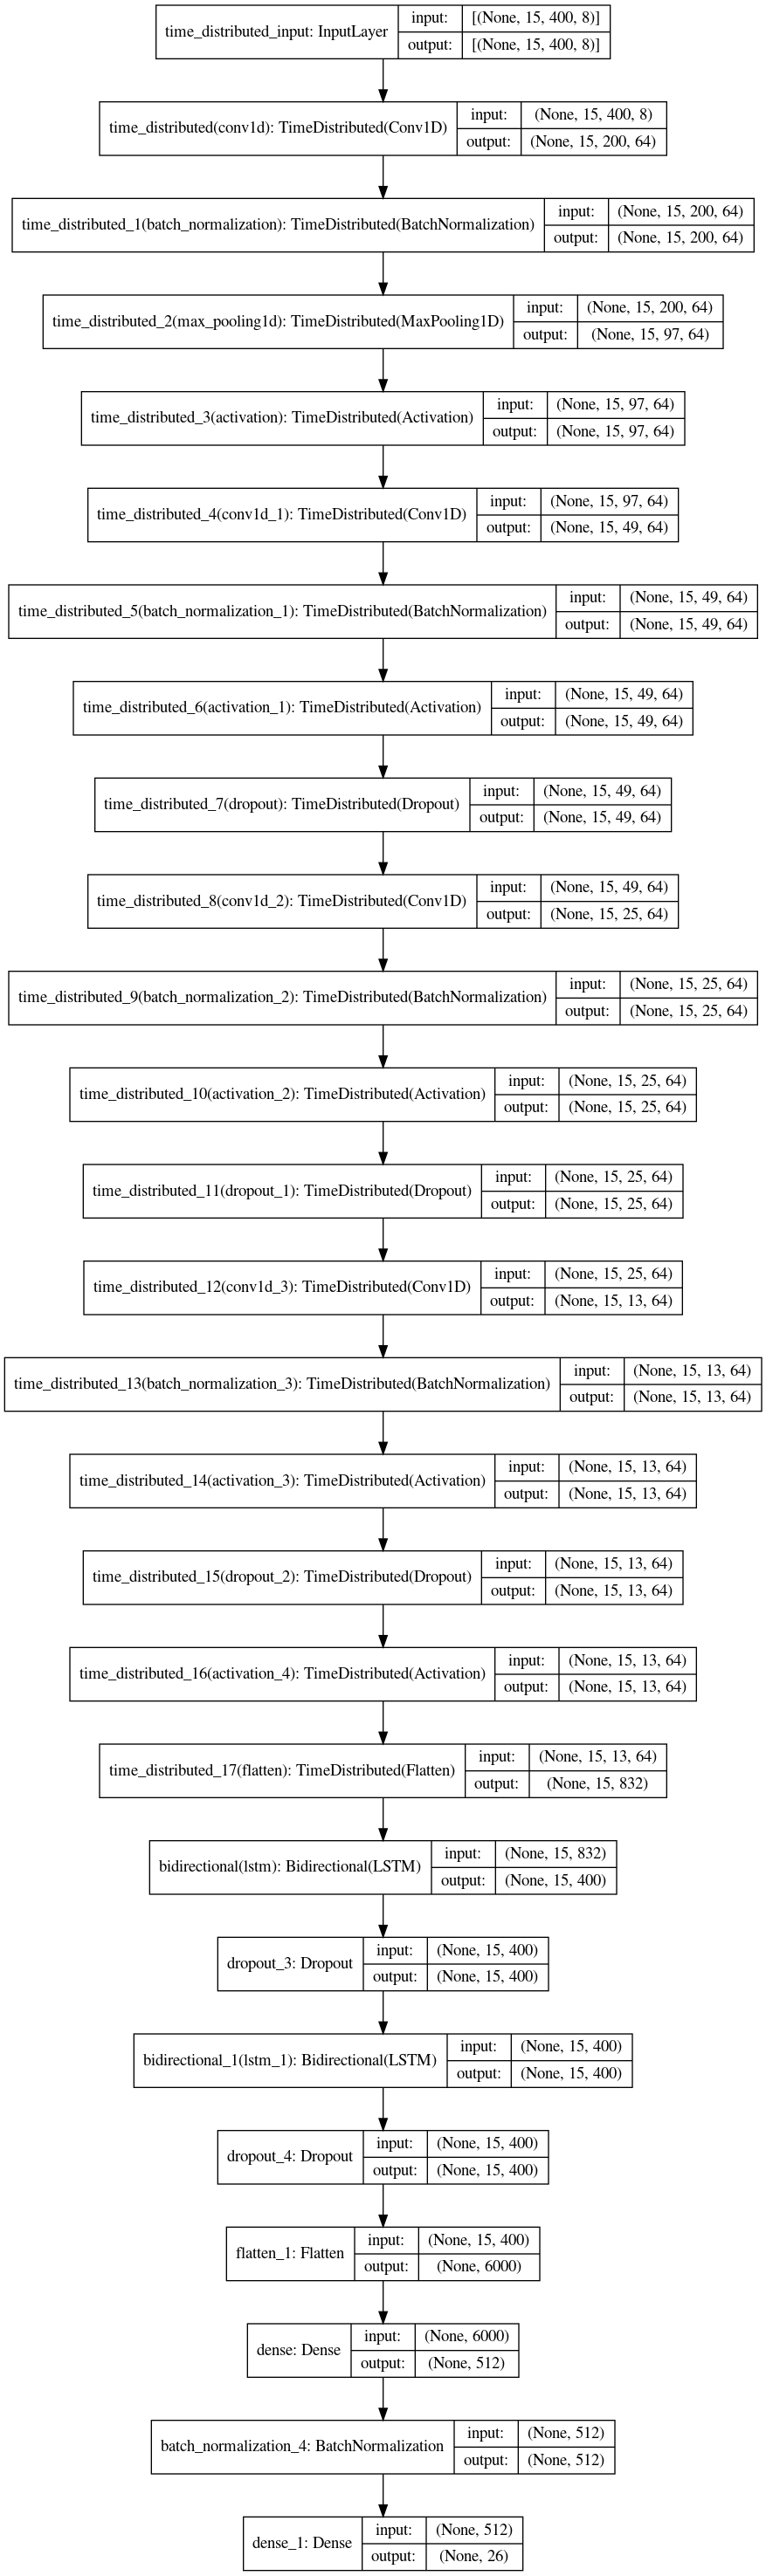

In [43]:
tf.keras.utils.plot_model(model, to_file='/media/naveen/nav/mat_codes/BioPatRec/no_prep/CNN60X100/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)

In [44]:
#     tf.keras.utils.plot_model(model, to_file='/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)
csv_logger = CSVLogger('/media/naveen/nav/mat_codes/BioPatRec/no_prep/CNN60X100/LSTM_nina_20X100.csv', append=True, separator=';')
history = model.fit(x_train, y_train_hot, epochs=epochs, batch_size=batch_size, callbacks=[csv_logger,checkpoint_callback,lrate],validation_data=(x_test, y_test_hot), verbose=1)

Epoch 1/200
56/56 [==============================] - 18s 153ms/step - loss: 4.7845 - accuracy: 0.0930 - val_loss: 4.1471 - val_accuracy: 0.1247

Epoch 00001: val_accuracy improved from -inf to 0.12472, saving model to /media/naveen/nav/mat_codes/BioPatRec/no_prep/CNN60X100/checkpoint.hdf5
Epoch 2/200
56/56 [==============================] - 1s 24ms/step - loss: 3.4365 - accuracy: 0.1504 - val_loss: 3.0231 - val_accuracy: 0.2245

Epoch 00002: val_accuracy improved from 0.12472 to 0.22449, saving model to /media/naveen/nav/mat_codes/BioPatRec/no_prep/CNN60X100/checkpoint.hdf5
Epoch 3/200
56/56 [==============================] - 1s 25ms/step - loss: 2.9461 - accuracy: 0.2303 - val_loss: 3.1227 - val_accuracy: 0.2449

Epoch 00003: val_accuracy improved from 0.22449 to 0.24490, saving model to /media/naveen/nav/mat_codes/BioPatRec/no_prep/CNN60X100/checkpoint.hdf5
Epoch 4/200
56/56 [==============================] - 1s 24ms/step - loss: 2.8492 - accuracy: 0.2511 - val_loss: 3.1796 - val_acc


Epoch 00036: val_accuracy did not improve from 0.64399
Epoch 37/200
56/56 [==============================] - 1s 25ms/step - loss: 0.6716 - accuracy: 0.9005 - val_loss: 2.2304 - val_accuracy: 0.4921

Epoch 00037: val_accuracy did not improve from 0.64399
Epoch 38/200
56/56 [==============================] - 1s 25ms/step - loss: 0.6594 - accuracy: 0.9008 - val_loss: 6.4114 - val_accuracy: 0.2200

Epoch 00038: val_accuracy did not improve from 0.64399
Epoch 39/200
56/56 [==============================] - 1s 24ms/step - loss: 0.7670 - accuracy: 0.8600 - val_loss: 2.9758 - val_accuracy: 0.4240

Epoch 00039: val_accuracy did not improve from 0.64399
Epoch 40/200
56/56 [==============================] - 1s 25ms/step - loss: 0.6344 - accuracy: 0.9097 - val_loss: 1.9864 - val_accuracy: 0.5488

Epoch 00040: val_accuracy did not improve from 0.64399
Epoch 41/200
56/56 [==============================] - 1s 27ms/step - loss: 0.5172 - accuracy: 0.9558 - val_loss: 1.9056 - val_accuracy: 0.5896

Epoc

56/56 [==============================] - 1s 25ms/step - loss: 0.3402 - accuracy: 0.9986 - val_loss: 1.8922 - val_accuracy: 0.6304

Epoch 00078: val_accuracy did not improve from 0.64399
Epoch 79/200
56/56 [==============================] - 1s 25ms/step - loss: 0.3453 - accuracy: 0.9931 - val_loss: 1.9167 - val_accuracy: 0.6168

Epoch 00079: val_accuracy did not improve from 0.64399
Epoch 80/200
56/56 [==============================] - 1s 25ms/step - loss: 0.3403 - accuracy: 0.9960 - val_loss: 1.8401 - val_accuracy: 0.6304

Epoch 00080: val_accuracy did not improve from 0.64399
Epoch 81/200
56/56 [==============================] - 1s 25ms/step - loss: 0.3383 - accuracy: 0.9957 - val_loss: 1.8819 - val_accuracy: 0.6304

Epoch 00081: val_accuracy did not improve from 0.64399
Epoch 82/200
56/56 [==============================] - 1s 25ms/step - loss: 0.3455 - accuracy: 0.9960 - val_loss: 1.8575 - val_accuracy: 0.6259

Epoch 00082: val_accuracy did not improve from 0.64399
Epoch 83/200
56/56

56/56 [==============================] - 2s 28ms/step - loss: 0.3002 - accuracy: 1.0000 - val_loss: 1.8676 - val_accuracy: 0.6440

Epoch 00118: val_accuracy did not improve from 0.66213
Epoch 119/200
56/56 [==============================] - 1s 27ms/step - loss: 0.3055 - accuracy: 0.9991 - val_loss: 1.9089 - val_accuracy: 0.6395

Epoch 00119: val_accuracy did not improve from 0.66213
Epoch 120/200
56/56 [==============================] - 2s 27ms/step - loss: 0.3028 - accuracy: 0.9988 - val_loss: 1.9327 - val_accuracy: 0.6372

Epoch 00120: val_accuracy did not improve from 0.66213
Epoch 121/200
56/56 [==============================] - 1s 26ms/step - loss: 0.3018 - accuracy: 0.9998 - val_loss: 1.9739 - val_accuracy: 0.6349

Epoch 00121: val_accuracy did not improve from 0.66213
Epoch 122/200
56/56 [==============================] - 1s 25ms/step - loss: 0.3009 - accuracy: 0.9974 - val_loss: 1.9018 - val_accuracy: 0.6349

Epoch 00122: val_accuracy did not improve from 0.66213
Epoch 123/200


56/56 [==============================] - 1s 25ms/step - loss: 0.2907 - accuracy: 1.0000 - val_loss: 1.7885 - val_accuracy: 0.6508

Epoch 00159: val_accuracy did not improve from 0.66213
Epoch 160/200
56/56 [==============================] - 1s 26ms/step - loss: 0.2863 - accuracy: 1.0000 - val_loss: 1.8275 - val_accuracy: 0.6349

Epoch 00160: val_accuracy did not improve from 0.66213
Epoch 161/200
56/56 [==============================] - 1s 25ms/step - loss: 0.2894 - accuracy: 1.0000 - val_loss: 1.8326 - val_accuracy: 0.6372

Epoch 00161: val_accuracy did not improve from 0.66213
Epoch 162/200
56/56 [==============================] - 1s 26ms/step - loss: 0.2861 - accuracy: 1.0000 - val_loss: 1.8483 - val_accuracy: 0.6417

Epoch 00162: val_accuracy did not improve from 0.66213
Epoch 163/200
56/56 [==============================] - 2s 28ms/step - loss: 0.2897 - accuracy: 1.0000 - val_loss: 1.8348 - val_accuracy: 0.6576

Epoch 00163: val_accuracy did not improve from 0.66213
Epoch 164/200


56/56 [==============================] - 1s 25ms/step - loss: 0.2844 - accuracy: 1.0000 - val_loss: 1.8266 - val_accuracy: 0.6372

Epoch 00200: val_accuracy did not improve from 0.66213


In [45]:
# #     tf.keras.utils.plot_model(model, to_file='/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)
# csv_logger = CSVLogger('/media/naveen/nav/mat_codes/BioPatRec/CNN60X100/LSTM_nina_20X100.csv', append=True, separator=';')
# history = model.fit(x_train, y_train_hot, epochs=epochs, batch_size=batch_size, callbacks=[csv_logger,checkpoint_callback,lrate,early],validation_data=(x_test, y_test_hot), verbose=1)


In [46]:
best_index = history.history['val_accuracy'].index(max(history.history['val_accuracy']))
print('epoch_number',best_index+1)
print('train accuracy and validation accuracy', history.history['accuracy'][best_index], history.history['val_accuracy'][best_index]) 

epoch_number 98
train accuracy and validation accuracy 0.9954699873924255 0.6621315479278564


In [47]:
model.save('/media/naveen/nav/mat_codes/BioPatRec/no_prep/CNN60X100/CNN_LSTM_nina_5X97')

INFO:tensorflow:Assets written to: /media/naveen/nav/mat_codes/BioPatRec/no_prep/CNN60X100/CNN_LSTM_nina_5X97/assets


INFO:tensorflow:Assets written to: /media/naveen/nav/mat_codes/BioPatRec/no_prep/CNN60X100/CNN_LSTM_nina_5X97/assets


history loss
history accuracy
history val_loss
history val_accuracy
history lr


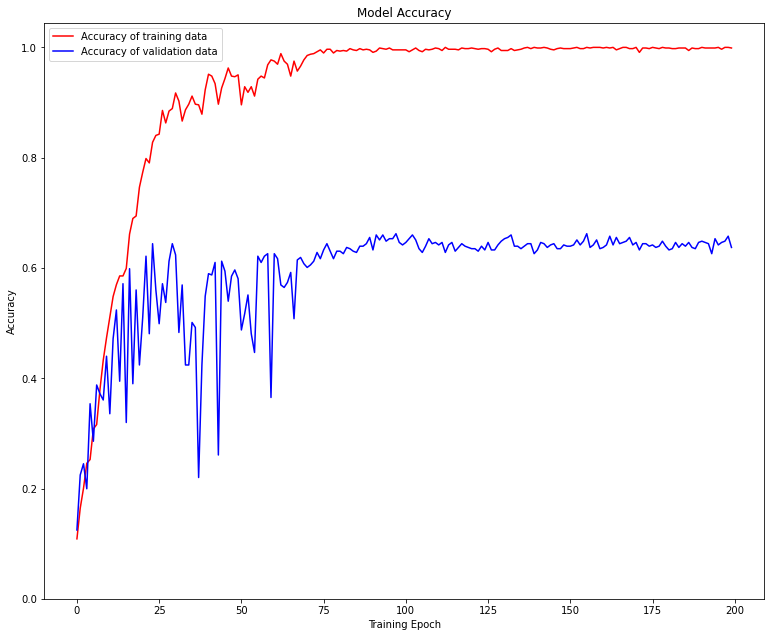

In [48]:
for i in history.history:
    print("history",i)
# facecolor='black'
BPRa=plt.figure(figsize=(10, 8),edgecolor='black')
# ax=figDB4.add_axes(("left", "bottom", "width", "height"))
ax= BPRa.add_axes((1,1,1,1))
ax.spines["top"].set_position(("outward", 0))
ax.spines["bottom"].set_position(("data", 0))
ax.spines["left"].set_position(("axes", 0))
ax.spines["right"].set_position(("outward", 0))

ax.spines["top"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["right"].set_color("black")
ax.spines["bottom"].set_color("black")

# ax.spines["left"].set_bounds(-.5, .5)
# ax.spines["right"].set_linestyle("--")
# ax.spines["bottom"].set_linewidth(6)
# ax.spines["bottom"].set_capstyle("round")

# plt2.rcParams['figure.facecolor'] = 'white'
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Training Epoch')

# plt2.ylim(0)
# plt2.rcParams['figure.facecolor'] = 'white'

# ax = fig.add_axes((left, bottom, width, height))
ax.set(facecolor="white")
# ax.patch.set_alpha(1.0)
plt.ylim(0)
plt.legend()
plt.show()

history loss
history accuracy
history val_loss
history val_accuracy
history lr


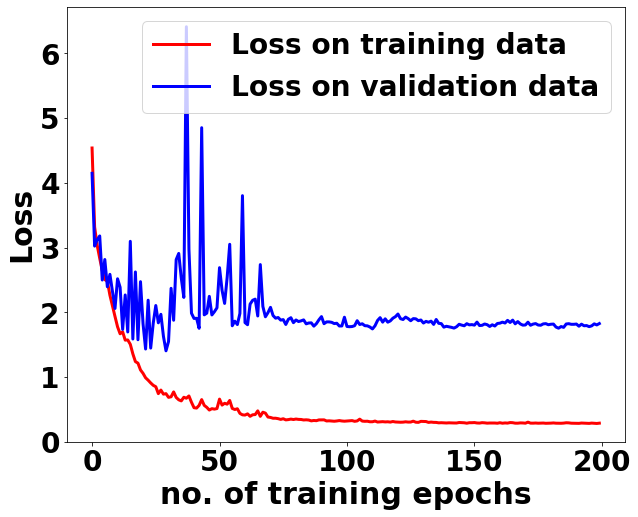

In [49]:
for i in history.history:
    print("history",i)
# facecolor='black'
# ax= figBPR.add_axes((1,1,1,1))
# ax.spines["top"].set_position(("outward", 0))
# ax.spines["bottom"].set_position(("data", 0))
# ax.spines["left"].set_position(("axes", 0))
# ax.spines["right"].set_position(("outward", 0))

# ax.spines["top"].set_color("black")
# ax.spines["left"].set_color("black")
# ax.spines["right"].set_color("black")
# ax.spines["bottom"].set_color("black") 

figBPR=plt.figure(figsize=(10, 8),edgecolor='black')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 28}

plt.rc('font', **font)

# SMALL_SIZE = 12
# MEDIUM_SIZE = 14
# BIGGER_SIZE = 18

# figBPR.suptitle('test title', fontsize=20)
#plt.rc('xlabel', fontsize=14, weight = 'bold')
#plt.rc('ylabel', fontsize=14, weight = 'bold')

# plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
# plt.rc('axes', labelsize=MEDIUM_SIZE )     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE, weight = 'bold')    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE )  # fontsize of the figure title

# ax=figBPR.add_axes(("left", "bottom", "width", "height"))
# ax= figBPR.add_axes((1,1,1,1))
# ax.spines["top"].set_position(("outward", 0))
# ax.spines["bottom"].set_position(("data", 0))
# ax.spines["left"].set_position(("axes", 0))
# ax.spines["right"].set_position(("outward", 0))

# ax.spines["top"].set_color("black")
# ax.spines["left"].set_color("black")
# ax.spines["right"].set_color("black")
# ax.spines["bottom"].set_color("black")

# ax.spines["left"].set_bounds(-.5, .5)
# ax.spines["right"].set_linestyle("--")

ax.spines["top"].set_linewidth(3)
ax.spines["top"].set_linestyle("-")
ax.spines["bottom"].set_linewidth(3)
ax.spines["bottom"].set_linestyle("-")
ax.spines["left"].set_linewidth(3)
ax.spines["left"].set_linestyle("-")
ax.spines["right"].set_linewidth(3)
ax.spines["right"].set_linestyle("-")
# ax.spines["bottom"].set_capstyle("round")

# plt2.rcParams['figure.facecolor'] = 'white'
plt.plot(history.history['loss'], 'r-', linewidth=3, label='Loss on training data')
plt.plot(history.history['val_loss'], 'b-', linewidth=3, label='Loss on validation data')
# plt.title('Loss curve for BioPatRec DB2',fontsize=18, weight = 'bold')

plt.ylabel('Loss',fontsize=30, weight = 'bold')
plt.xlabel('no. of training epochs',fontsize=30, weight = 'bold')
# plt2.ylim(0)
# plt2.rcParams['figure.facecolor'] = 'white'

# ax = fig.add_axes((left, bottom, width, height))
ax.set(facecolor="white")
# ax.patch.set_alpha(1.0)
plt.ylim(0)
plt.legend()
plt.show()

In [50]:
# figBPR.savefig('/media/naveen/nav/plots/BioPatRec_15X400.eps',transparent=False)
# figBPR.savefig('/media/naveen/nav/plots/BioPatRec_20X300.pdf',transparent=False)

In [51]:
model.load_weights(checkpoint_filepath) 
_, testaccuracy = model.evaluate(x_test, y_test_hot, batch_size=batch_size, verbose=1)
print('test_accuracy',testaccuracy)

28/28 [==============================] - 0s 8ms/step - loss: 1.7890 - accuracy: 0.6621
test_accuracy 0.6621315479278564


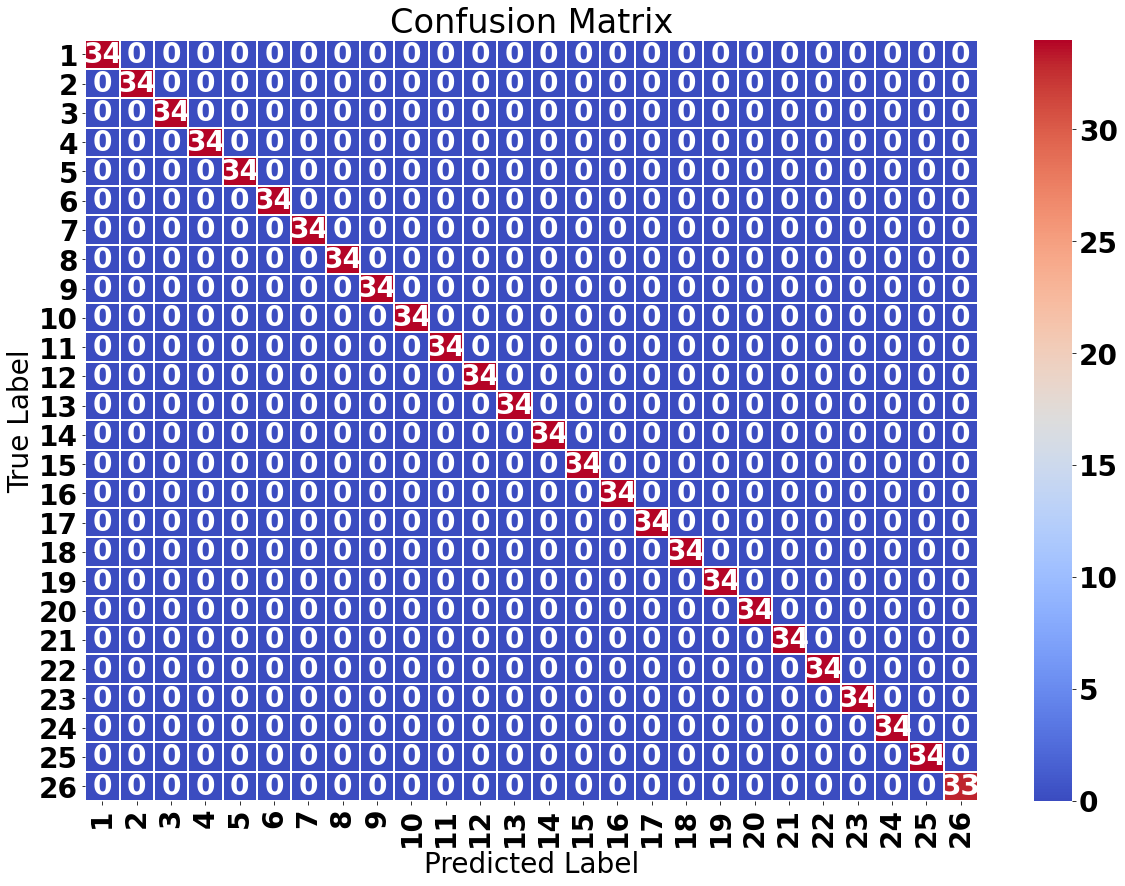

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        34
           5       1.00      1.00      1.00        34
           6       1.00      1.00      1.00        34
           7       1.00      1.00      1.00        34
           8       1.00      1.00      1.00        34
           9       1.00      1.00      1.00        34
          10       1.00      1.00      1.00        34
          11       1.00      1.00      1.00        34
          12       1.00      1.00      1.00        34
          13       1.00      1.00      1.00        34
          14       1.00      1.00      1.00        34
          15       1.00      1.00      1.00        34
          16       1.00      1.00      1.00        34
          17       1.00    

In [52]:
y_pred_train = model.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
#max_y_train = np.argmax(y_train, axis=1)
show_confusion_matrix(y_train, max_y_pred_train)
print(classification_report(y_train, max_y_pred_train))

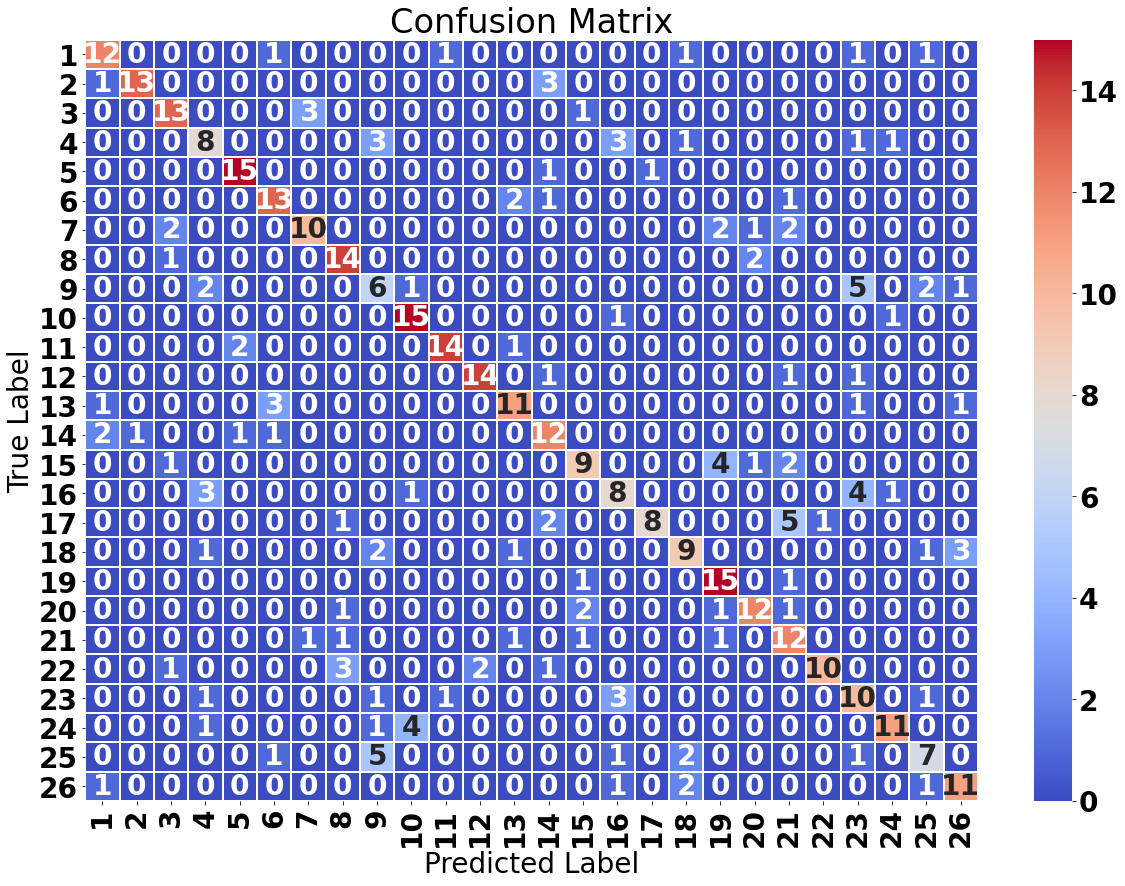

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        17
           1       0.93      0.76      0.84        17
           2       0.72      0.76      0.74        17
           3       0.50      0.47      0.48        17
           4       0.83      0.88      0.86        17
           5       0.68      0.76      0.72        17
           6       0.71      0.59      0.65        17
           7       0.70      0.82      0.76        17
           8       0.33      0.35      0.34        17
           9       0.71      0.88      0.79        17
          10       0.88      0.82      0.85        17
          11       0.88      0.82      0.85        17
          12       0.69      0.65      0.67        17
          13       0.57      0.71      0.63        17
          14       0.64      0.53      0.58        17
          15       0.47      0.47      0.47        17
          16       0.89      0.47      0.62        17
          17       0.60    

In [53]:
y_pred_test = model.predict(x_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_hot, axis=1)
show_confusion_matrix(max_y_test, max_y_pred_test)
print(classification_report(max_y_test, max_y_pred_test))

In [54]:
# model = Sequential()
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)), \
#                            input_shape=(n_steps,n_length,n_depth)))
# model.add(TimeDistributed(MaxPooling1D(pool_size=8,strides=2)))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Activation('relu')))
# model.add(TimeDistributed(Flatten()))
# # model.add(Bidirectional(LSTM(200,return_sequences=True)))
# # model.add(Dropout(0.5))
# # model.add(Bidirectional(LSTM(200,return_sequences=True)))
# # model.add(Dropout(0.5))
# # model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
# model.add(Bidirectional(LSTM(200)))
# model.add(Dropout(0.5))
# model.add(Dense(512, activation='tanh'))
# model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
# model.add(Dense(n_outputs, activation='softmax'))

In [55]:
# model = Sequential()
# model.add(TimeDistributed(Conv2D(filters=64, kernel_size=(9,1), padding='same', kernel_initializer="he_normal",strides=(3,1),kernel_regularizer=l1(1e-04)), \
#                            input_shape=(n_steps,n_length,n_depth,n_sub)))
# model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
# model.add(TimeDistributed(MaxPooling2D(pool_size=(8,1),strides=(2,1))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Conv2D(filters=64, kernel_size=(5,1),padding="same",kernel_initializer="he_normal",strides=(2,1),kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Activation('relu')))
# model.add(Flatten())
# model.add(Dense(512, activation='tanh',kernel_initializer="he_normal"))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
# model.add(Activation('tanh'))
# model.add(Dense(n_outputs, activation='softmax',kernel_initializer="he_normal"))

In [56]:
# model = Sequential()
# model.add(Conv2D(filters=64, kernel_size=(9,1), padding='same', kernel_initializer="he_normal",strides=(3,1),kernel_regularizer=l1(1e-04), \
#                            input_shape=(n_steps,n_length,n_depth)))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
# model.add(MaxPooling2D(pool_size=(8,1),strides=(2,1)))
# model.add(Activation('tanh'))
# model.add(Conv2D(filters=64, kernel_size=(5,1),padding="same",kernel_initializer="he_normal",strides=(2,1),kernel_regularizer=l1(1e-04)))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
# model.add(Activation('tanh'))
# model.add(Dropout(0.2093))
# model.add(Activation('relu'))
# model.add(Flatten())
# model.add(Dense(512, activation='tanh',kernel_initializer="he_normal"))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
# model.add(Activation('tanh'))
# model.add(Dense(n_outputs, activation='softmax',kernel_initializer="he_normal"))
# adam=optimizers.Adam(lr=2.17e-3, beta_1=0.9, beta_2=0.999,epsilon=1e-08, amsgrad=False)

In [57]:
# model = Sequential()
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=3,kernel_regularizer=l1(1e-04)), \
#                            input_shape=(n_steps,n_length,n_depth)))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
# model.add(TimeDistributed(MaxPooling1D(pool_size=8,strides=2)))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Activation('relu')))
# model.add(Flatten())
# model.add(Dense(512, activation='tanh'))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
# model.add(Dense(n_outputs, activation='softmax'))